<a href="https://colab.research.google.com/github/DulanaH2D/Used_Vehicle_Price_Prediction_Model/blob/main/used_toyota_vehicle_price_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
import seaborn as sns
from google.colab import files
import re

# Upload csv file

In [ ]:
uploaded = files.upload()
fileName = next(iter(uploaded))
print("File Name: " + fileName)

Saving toyota_used_vehicle_prices.csv to toyota_used_vehicle_prices.csv
File Name: toyota_used_vehicle_prices.csv


# Read the csv

In [ ]:
df1 = pd.read_csv(fileName)
df1.head()

,Brand,Model,Year of Manufacture,Condition,Transmission,Body type,Fuel type,Engine capacity,Mileage,Price
0,Toyota,Aqua,2015,Used,Automatic,Hatchback,Hybrid,1500,80000,9595000
1,Toyota,Aqua,2013,Used,Automatic,Hatchback,Hybrid,1490,160000,7600000
2,Toyota,Vitz,2018,Used,Automatic,Hatchback,Petrol,1000,69015,9300000
3,Toyota,Land Cruiser Prado,2017,Used,Tiptronic,SUV / 4x4,Petrol,2796,48000,44500000
4,Toyota,Premio,2014,Used,Automatic,Saloon,Petrol,1500,90000,10250000


# Data Preprocessing

### All the column names and values to lower case and replace spaces with underscores

In [ ]:
# Column names Convert all column names to lowercase and replace spaces with underscores
df1.columns = df1.columns.str.lower().str.replace(r'\s+', '_', regex=True)

# Cell values
df1 = df1.apply(lambda col: col.map(lambda x: re.sub(r'\s+', '_', x.lower()) if isinstance(x, str) else x))


# Show the result
df1.head()

,brand,model,year_of_manufacture,condition,transmission,body_type,fuel_type,engine_capacity,mileage,price
0,toyota,aqua,2015,used,automatic,hatchback,hybrid,1500,80000,9595000
1,toyota,aqua,2013,used,automatic,hatchback,hybrid,1490,160000,7600000
2,toyota,vitz,2018,used,automatic,hatchback,petrol,1000,69015,9300000
3,toyota,land_cruiser_prado,2017,used,tiptronic,suv_/_4x4,petrol,2796,48000,44500000
4,toyota,premio,2014,used,automatic,saloon,petrol,1500,90000,10250000


### Row count and Column count

In [ ]:
df1.shape

(1170, 10)

### Model variation count

In [ ]:
df1.groupby('model')['model'].agg('count')

,model
model,
allion,88
alphard,1
aqua,131
avanza,6
axio,82
belta,20
camry,15
chr,74
corolla,4


### Remove the rows where the count of each **model** is less than 4

In [ ]:
# Step 1: Count the occurrences of each model
model_counts = df1['model'].value_counts()

# Step 2: Filter models that appear at least 4 times
models_to_keep = model_counts[model_counts >= 4].index

# Step 3: Filter the original DataFrame to keep only rows with those models
df1_filtered = df1[df1['model'].isin(models_to_keep)]

# Display the filtered DataFrame
df1_filtered.head()

# update the existing dataframe
df1 = df1_filtered
df1.groupby('model')['model'].agg('count')

,model
model,
allion,88
aqua,131
avanza,6
axio,82
belta,20
camry,15
chr,74
corolla,4
fortuner,9


### Transmission Variation count

In [ ]:
df1.groupby('transmission')['transmission'].agg('count')

,transmission
transmission,
automatic,1046
manual,81
other_transmission,2
tiptronic,23


### Remove the rows where the count of each **transmission** is less than 4



In [ ]:
# Step 1: Count the occurrences of each transmission
transmission_counts = df1['transmission'].value_counts()

# Step 2: Filter transmissions that appear at least 4 times
transmissions_to_keep = transmission_counts[transmission_counts >= 4].index

# Step 3: Filter the original DataFrame to keep only rows with those models
df1_filtered = df1[df1['transmission'].isin(transmissions_to_keep)]

# Display the filtered DataFrame
df1_filtered.head()

# update the existing dataframe
df1 = df1_filtered
df1.groupby('transmission')['transmission'].agg('count')


,transmission
transmission,
automatic,1046
manual,81
tiptronic,23


### Body type variation count

In [ ]:
df1.groupby('body_type')['body_type'].agg('count')

,body_type
body_type,
coupãƒâ©/sports,1
hatchback,382
mpv,8
saloon,435
sedan,4
station_wagon,28
suv_/_4*4,96
suv_/_4x4,167


### Replace **" suv / 4*4 "** with **" suv / 4x4 "**



In [ ]:
# Replace 'suv / 4*4' and other possible variations with 'suv_/_4x4'
df1['body_type'] = df1['body_type'].replace({
    'suv / 4*4': 'suv_/_4x4',
    'suv/4*4': 'suv_/_4x4',  # if you have this variation too
    'suv/4x4': 'suv_/_4x4',
    'suv / 4x4': 'suv_/_4x4',
    'suv_/_4*4' : 'suv_/_4x4'
})

# Display updated counts
df1['body_type'].value_counts()

,count
body_type,
saloon,435
hatchback,382
suv_/_4x4,263
station_wagon,28
mpv,8
sedan,4
coupãƒâ©/sports,1


### Remove the rows where the count of each **body type** is less than 4

In [ ]:
# Step 1: Count the occurrences of each body type
body_type_counts = df1['body_type'].value_counts()

# Step 2: Filter body types that appear at least 4 times
body_types_to_keep = body_type_counts[body_type_counts >= 4].index

# Step 3: Filter the original DataFrame to keep only rows with those models
df1_filtered = df1[df1['body_type'].isin(body_types_to_keep)]

# Display the filtered DataFrame
df1_filtered.head()

# update the existing dataframe
df1 = df1_filtered
df1.groupby('body_type')['body_type'].agg('count')

,body_type
body_type,
hatchback,382
mpv,8
saloon,435
sedan,4
station_wagon,28
suv_/_4x4,263


### Fuel type variation count

In [ ]:
df1.groupby('fuel_type')['fuel_type'].agg('count')

,fuel_type
fuel_type,
diesel,176
hybrid,335
petrol,609


### Engine capacity variation count

In [ ]:
df1.groupby('engine_capacity')['engine_capacity'].agg('count')

,engine_capacity
engine_capacity,
1,1
3,1
288,1
900,1
990,26
...,...
4200,2
4400,1
4461,7


### Remove the rows where the count of each **body type** is less than 4

*   2010 - 2019 ( Minimum 990 CC - Maximum 5700 cc )



In [ ]:
# Step 1: Count the occurrences of each engine_capacity
engine_capacity_counts = df1['engine_capacity'].value_counts()

# Step 2: Filter engine_capacities that appear at least 4 times
engine_capacities_to_keep = engine_capacity_counts[engine_capacity_counts >= 4].index

# Step 3: Filter the original DataFrame to keep only rows with those models
df1_filtered = df1[df1['engine_capacity'].isin(engine_capacities_to_keep)]

# Display the filtered DataFrame
df1_filtered.head()

# update the existing dataframe
df1 = df1_filtered
df1.groupby('engine_capacity')['engine_capacity'].agg('count')

,engine_capacity
engine_capacity,
990,26
1000,124
1190,6
1200,60
1300,30
1490,58
1496,4
1499,6
1500,325


### Drop **Brand** and **Condition** Columns -> all the data duplicated

In [ ]:
df2 = df1.drop(['brand', 'condition'], axis=1)
df2.head()

,model,year_of_manufacture,transmission,body_type,fuel_type,engine_capacity,mileage,price
0,aqua,2015,automatic,hatchback,hybrid,1500,80000,9595000
1,aqua,2013,automatic,hatchback,hybrid,1490,160000,7600000
2,vitz,2018,automatic,hatchback,petrol,1000,69015,9300000
4,premio,2014,automatic,saloon,petrol,1500,90000,10250000
5,corolla,2018,automatic,hatchback,petrol,1200,87000,15800000


### identify NA values

In [ ]:
df2.isnull().sum()

,0
model,0
year_of_manufacture,0
transmission,0
body_type,0
fuel_type,0
engine_capacity,0
mileage,0
price,0


In [ ]:
df2.shape

(1065, 8)

# Feature engineering

### Add new two features


*   vehicle_age
*   mileage_per_year



In [ ]:
from datetime import datetime

df3 = df2.copy()

current_year = datetime.now().year
# calculate vehicle age
df3['vehicle_age'] = current_year - df3['year_of_manufacture']

# replace age 0 with 1
df3['vehicle_age_for_calc'] = df3['vehicle_age'].replace(0, 1)
# calculate mileage per year
df3['mileage_per_year'] = df3['mileage'] / df3['vehicle_age_for_calc']
# remove tempory column
df3.drop(columns=['vehicle_age_for_calc'], inplace=True)

df3.head(20)

,model,year_of_manufacture,transmission,body_type,fuel_type,engine_capacity,mileage,price,vehicle_age,mileage_per_year
0,aqua,2015,automatic,hatchback,hybrid,1500,80000,9595000,10,8000.000000
1,aqua,2013,automatic,hatchback,hybrid,1490,160000,7600000,12,13333.333333
2,vitz,2018,automatic,hatchback,petrol,1000,69015,9300000,7,9859.285714
4,premio,2014,automatic,saloon,petrol,1500,90000,10250000,11,8181.818182
5,corolla,2018,automatic,hatchback,petrol,1200,87000,15800000,7,12428.571429
6,land_cruiser_sahara,2011,automatic,suv_/_4x4,diesel,4500,61000,59850000,14,4357.142857
7,prius,2013,automatic,saloon,hybrid,1800,130000,10450000,12,10833.333333
8,land_cruiser_prado,2017,automatic,suv_/_4x4,petrol,2700,4700,55000000,8,587.500000
9,prius,2013,automatic,hatchback,hybrid,1800,175000,11900000,12,14583.333333
10,land_cruiser_prado,2014,automatic,suv_/_4x4,diesel,3000,140000,39500000,11,12727.272727


In [ ]:
df3.shape

(1065, 10)

# Data Visualizations

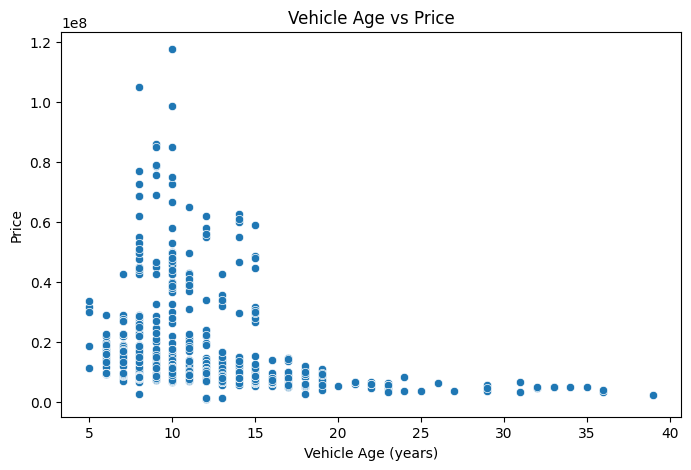

In [ ]:
# Scatter plot: Vehicle Age vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='vehicle_age', y='price')
plt.title('Vehicle Age vs Price')
plt.xlabel('Vehicle Age (years)')
plt.ylabel('Price')
plt.show()

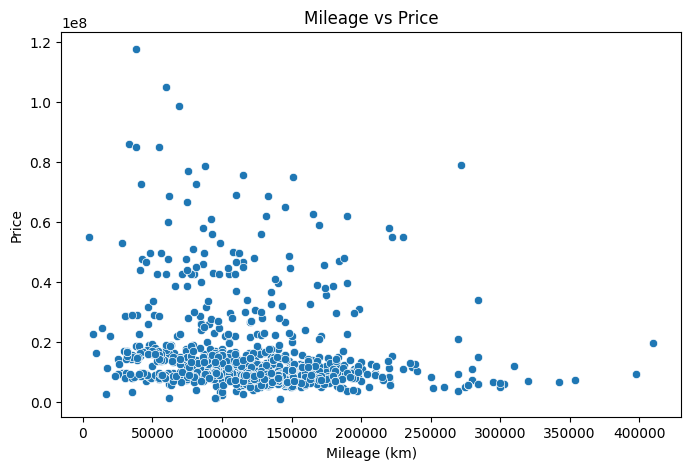

In [ ]:
# Scatter plot: Mileage vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='mileage', y='price')
plt.title('Mileage vs Price')
plt.xlabel('Mileage (km)')
plt.ylabel('Price')
plt.show()

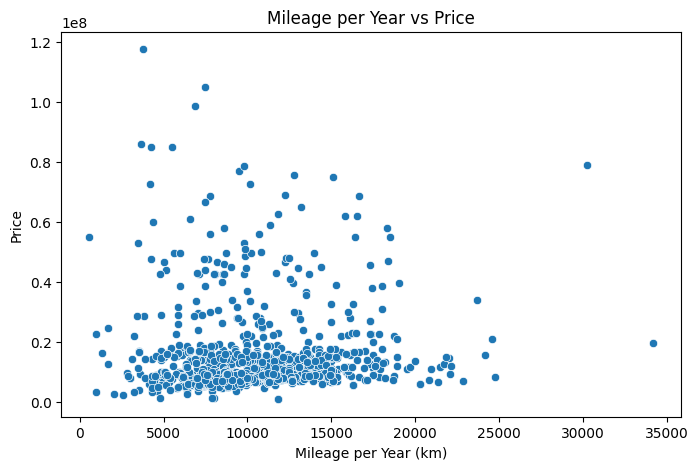

In [ ]:
# Scatter plot: Mileage per Year vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='mileage_per_year', y='price')
plt.title('Mileage per Year vs Price')
plt.xlabel('Mileage per Year (km)')
plt.ylabel('Price')
plt.show()

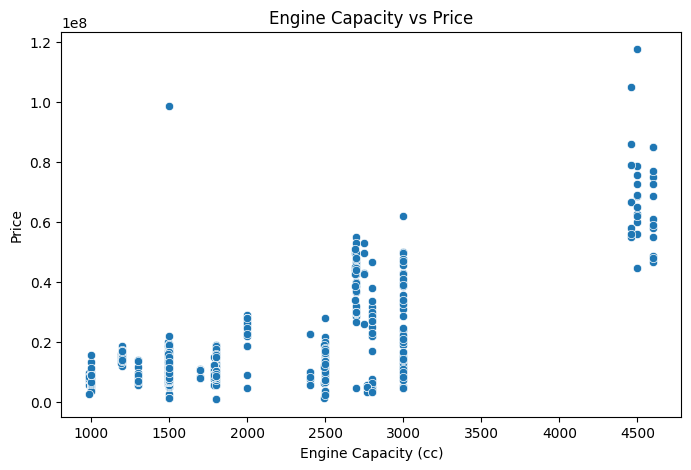

In [ ]:
# Scatter plot: Engine Capacity vs Price
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df3, x='engine_capacity', y='price')
plt.title('Engine Capacity vs Price')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Price')
plt.show()

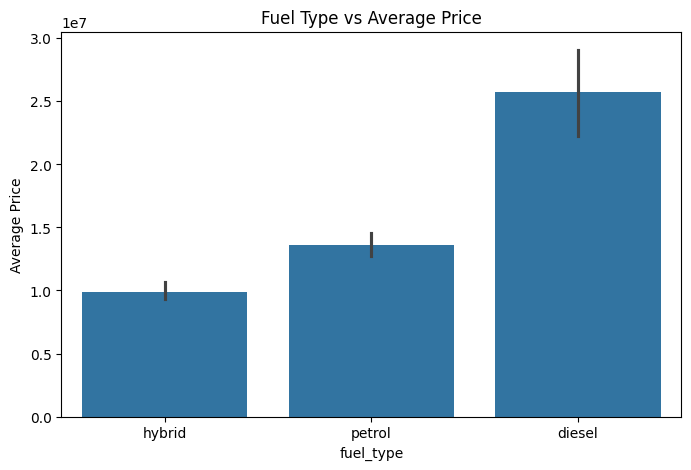

In [ ]:
# Bar plot: Fuel Type vs Average Price
plt.figure(figsize=(8, 5))
sns.barplot(data=df3, x='fuel_type', y='price', estimator=lambda x: sum(x)/len(x))
plt.title('Fuel Type vs Average Price')
plt.ylabel('Average Price')
plt.show()

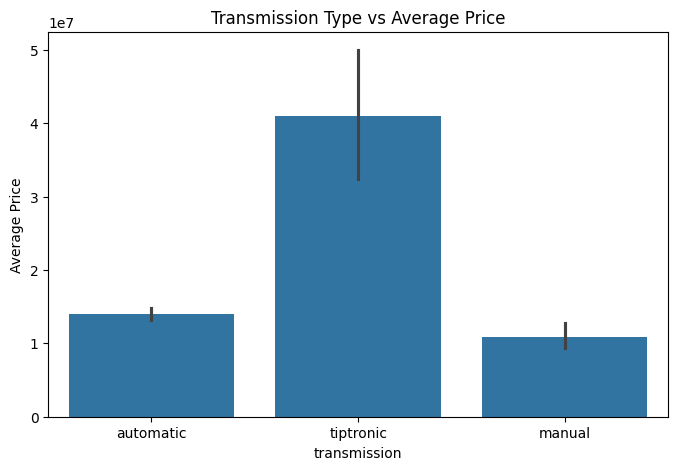

In [ ]:
# Bar plot: Transmission vs Average Price
plt.figure(figsize=(8, 5))
sns.barplot(data=df3, x='transmission', y='price')
plt.title('Transmission Type vs Average Price')
plt.ylabel('Average Price')
plt.show()

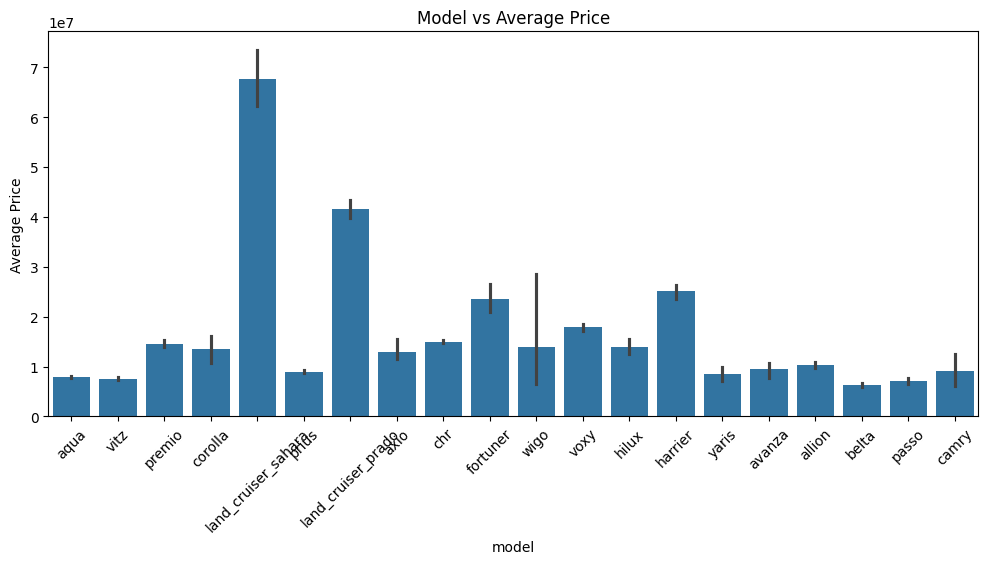

In [ ]:
# Bar plot: Model vs Average Price
plt.figure(figsize=(12, 5))
sns.barplot(data=df3, x='model', y='price')
plt.title('Model vs Average Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

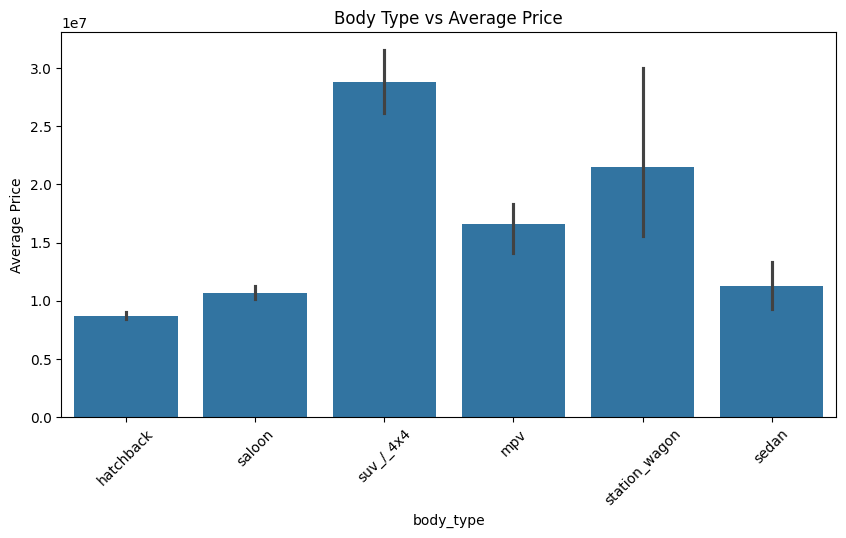

In [ ]:
# Bar plot: Body Type vs Average Price
plt.figure(figsize=(10, 5))
sns.barplot(data=df3, x='body_type', y='price')
plt.title('Body Type vs Average Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Outlier detection and Removal

### Outlier detection

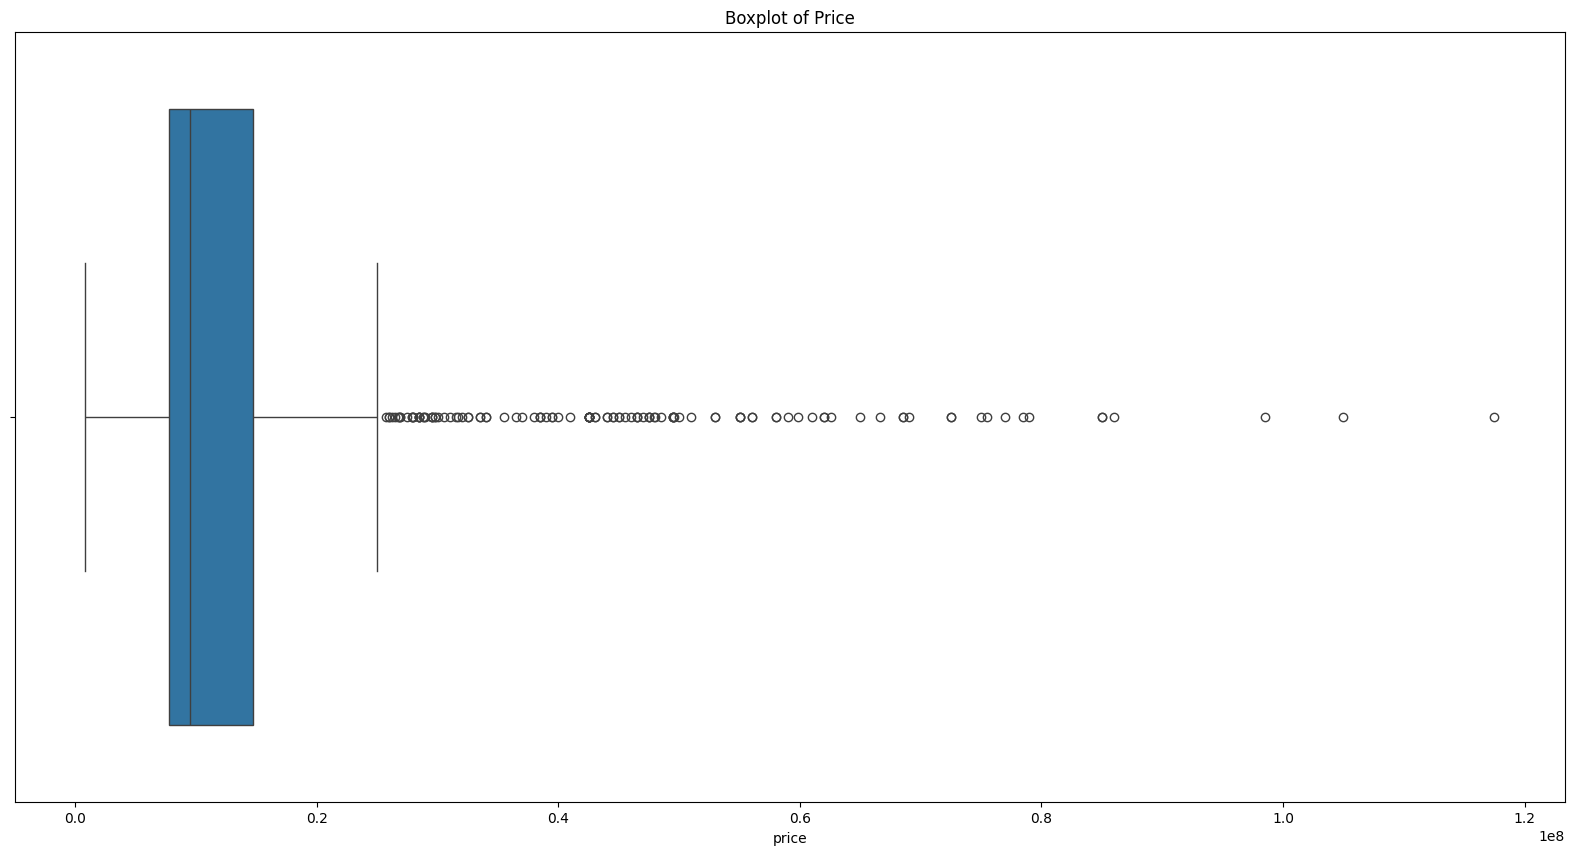

In [ ]:
df4 = df3.copy()

# Price
sns.boxplot(x=df4['price'])
plt.title('Boxplot of Price')
plt.show()

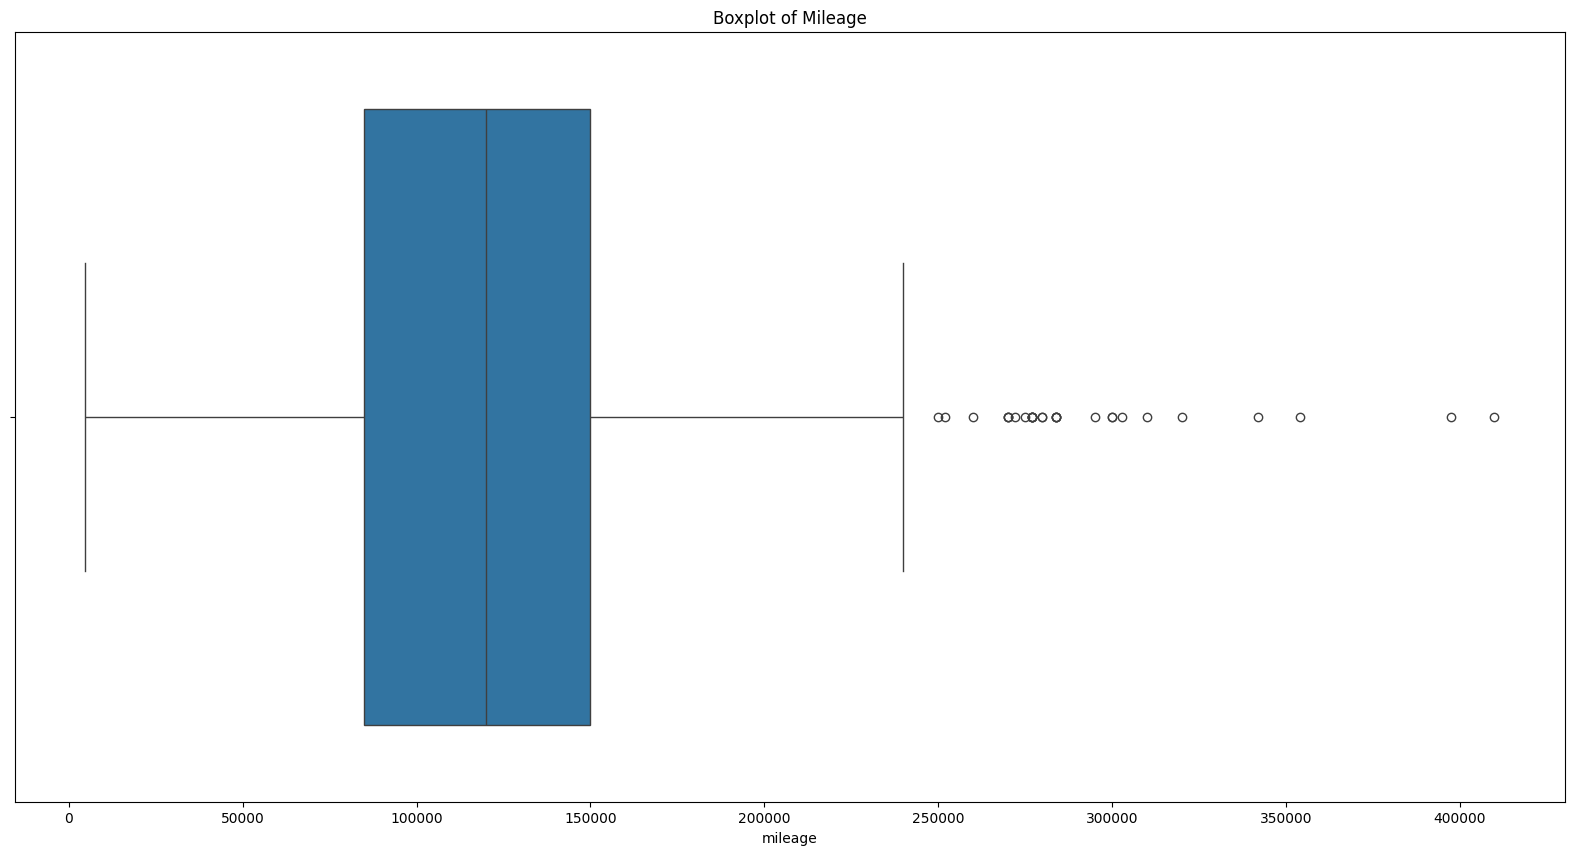

In [ ]:
# Mileage
sns.boxplot(x=df4['mileage'])
plt.title('Boxplot of Mileage')
plt.show()

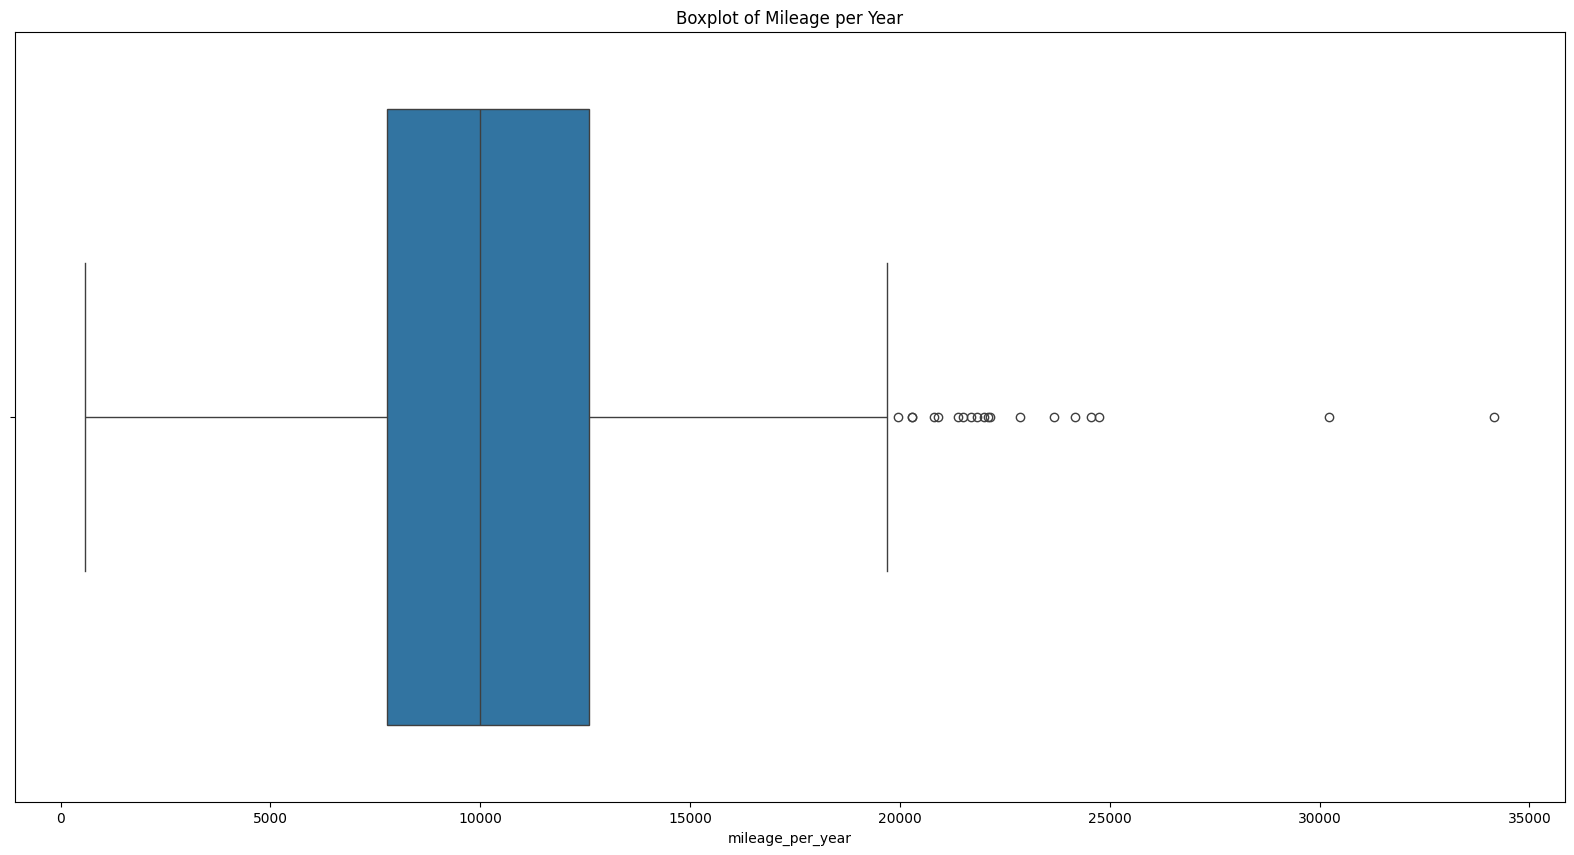

In [ ]:
# Mileage per year
sns.boxplot(x=df4['mileage_per_year'])
plt.title('Boxplot of Mileage per Year')
plt.show()

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"{column} Outlier thresholds: {lower_bound} - {upper_bound}")

    # Return DataFrame without outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply on multiple columns:
for col in ['price', 'mileage', 'mileage_per_year']:
    df4 = remove_outliers_iqr(df4, col)


price Outlier thresholds: -2575000.0 - 25065000.0
mileage Outlier thresholds: -6500.0 - 245500.0
mileage_per_year Outlier thresholds: 922.8125000000009 - 19292.979166666664


### After outlier removal

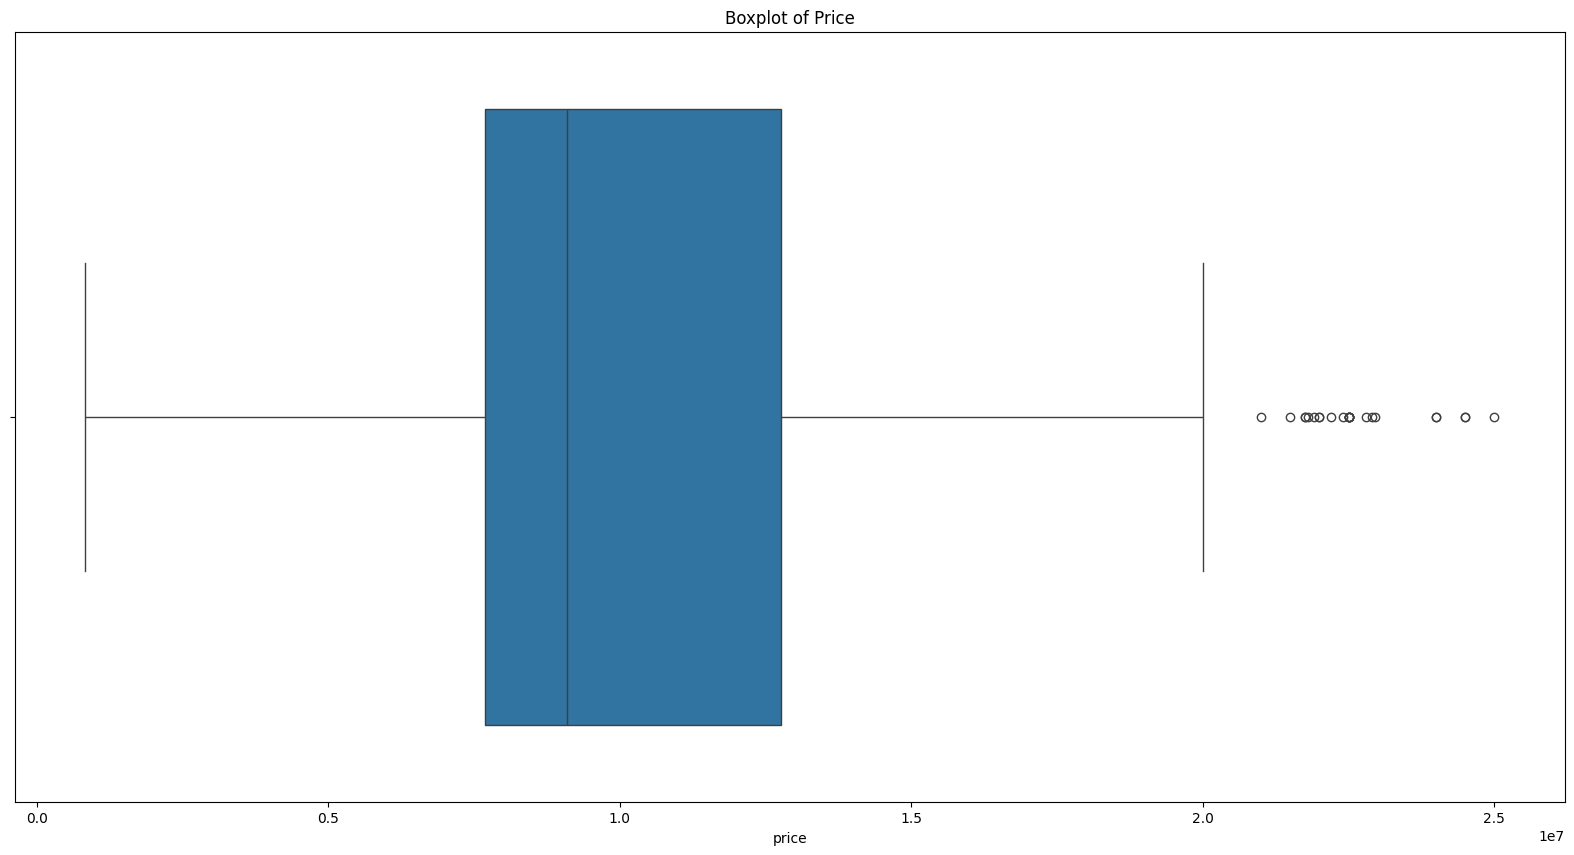

In [ ]:
# Price
sns.boxplot(x=df4['price'])
plt.title('Boxplot of Price')
plt.show()

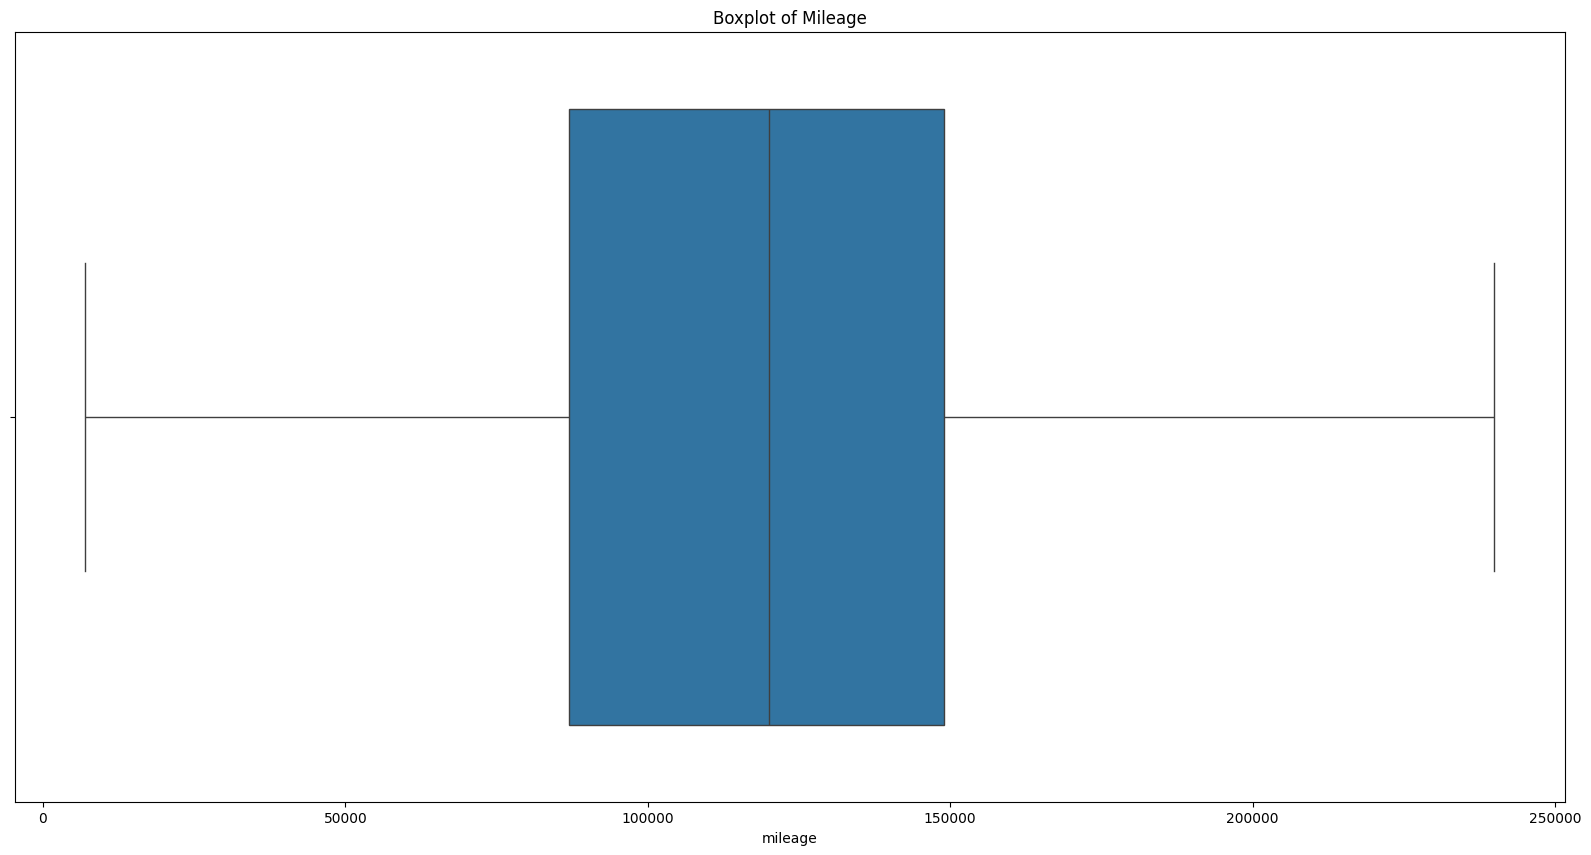

In [ ]:
# Mileage
sns.boxplot(x=df4['mileage'])
plt.title('Boxplot of Mileage')
plt.show()

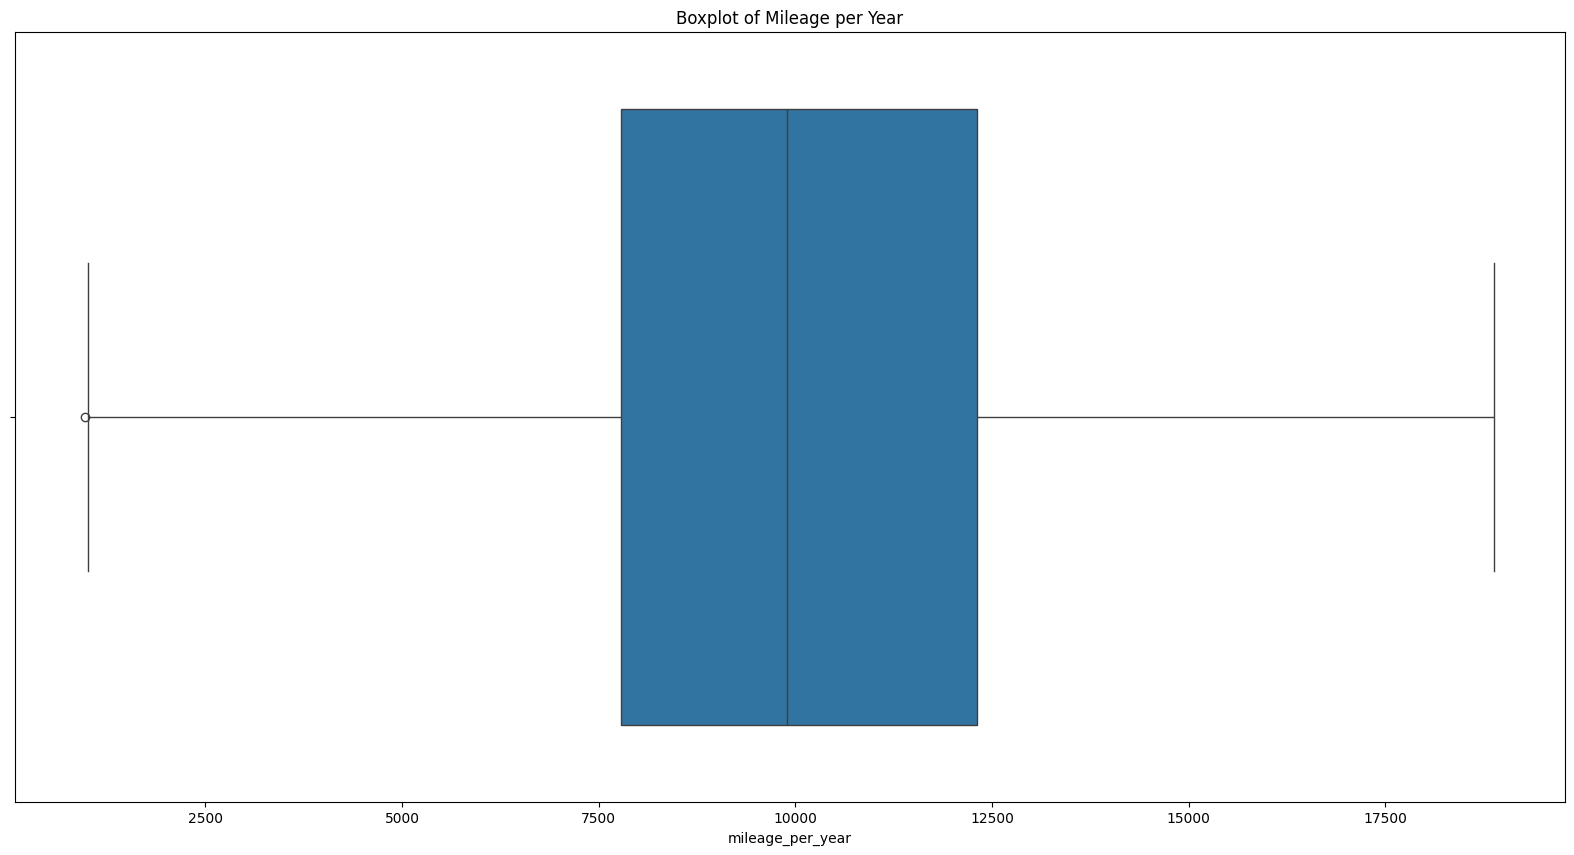

In [ ]:
# Mileage per year
sns.boxplot(x=df4['mileage_per_year'])
plt.title('Boxplot of Mileage per Year')
plt.show()

In [ ]:
df4.shape

(911, 10)

In [ ]:
df4.head()

,model,year_of_manufacture,transmission,body_type,fuel_type,engine_capacity,mileage,price,vehicle_age,mileage_per_year
0,aqua,2015,automatic,hatchback,hybrid,1500,80000,9595000,10,8000.000000
1,aqua,2013,automatic,hatchback,hybrid,1490,160000,7600000,12,13333.333333
2,vitz,2018,automatic,hatchback,petrol,1000,69015,9300000,7,9859.285714
4,premio,2014,automatic,saloon,petrol,1500,90000,10250000,11,8181.818182
5,corolla,2018,automatic,hatchback,petrol,1200,87000,15800000,7,12428.571429


# Model Building

In [ ]:
df4.groupby('model')['model'].agg('count')

,model
model,
allion,87
aqua,122
avanza,4
axio,71
belta,20
camry,9
chr,65
corolla,4
fortuner,5


In [ ]:
df4.groupby('transmission')['transmission'].agg('count')

,transmission
transmission,
automatic,856
manual,49
tiptronic,6


In [ ]:
df4.groupby('body_type')['body_type'].agg('count')

,body_type
body_type,
hatchback,366
mpv,6
saloon,407
sedan,4
station_wagon,21
suv_/_4x4,107


In [ ]:
df4.groupby('fuel_type')['fuel_type'].agg('count')

,fuel_type
fuel_type,
diesel,84
hybrid,318
petrol,509


### Encoding string to numerical values - one hot encoding

In [ ]:
# Columns to encode
categorical_columns = ['model', 'transmission', 'body_type', 'fuel_type']

# One-hot encode with drop_first=True
df5 = pd.get_dummies(df4, columns=categorical_columns, drop_first=True, dtype=int)

df5.head()

,year_of_manufacture,engine_capacity,mileage,price,vehicle_age,mileage_per_year,model_aqua,model_avanza,model_axio,model_belta,...,model_yaris,transmission_manual,transmission_tiptronic,body_type_mpv,body_type_saloon,body_type_sedan,body_type_station_wagon,body_type_suv_/_4x4,fuel_type_hybrid,fuel_type_petrol
0,2015,1500,80000,9595000,10,8000.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,1490,160000,7600000,12,13333.333333,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2018,1000,69015,9300000,7,9859.285714,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,1500,90000,10250000,11,8181.818182,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,2018,1200,87000,15800000,7,12428.571429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df5.shape

(911, 32)

### split x and y

In [ ]:
x = df5.drop('price', axis='columns')
x.head()

,year_of_manufacture,engine_capacity,mileage,vehicle_age,mileage_per_year,model_aqua,model_avanza,model_axio,model_belta,model_camry,...,model_yaris,transmission_manual,transmission_tiptronic,body_type_mpv,body_type_saloon,body_type_sedan,body_type_station_wagon,body_type_suv_/_4x4,fuel_type_hybrid,fuel_type_petrol
0,2015,1500,80000,10,8000.000000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2013,1490,160000,12,13333.333333,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2018,1000,69015,7,9859.285714,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2014,1500,90000,11,8181.818182,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
5,2018,1200,87000,7,12428.571429,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y = df5['price']
y.head()

,price
0,9595000
1,7600000
2,9300000
4,10250000
5,15800000


### Split training and test data set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

### Training data - LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train, y_train)
lr_clf.score(x_test, y_test)

0.7566838994065375

### Suffle the data and crossvalidation

In [ ]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87619785, 0.83876622, 0.86747912, 0.78497179, 0.75755253])

### Run under different algorthms - Hyperparamter turning



*   GridSearchCv -> best algorithm selection also for that particular algorithms it will tell the best params.






In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
# pip install xgboost
from xgboost import XGBRegressor


def find_best_model_using_gridsearchcv(x, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Pipeline([
                ('scaler', StandardScaler()),
                ('lasso', Lasso(max_iter=20000))
            ]),
            'params': {
                'lasso__alpha': [10, 50, 100, 200],
                'lasso__selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'criterion': ['squared_error'],
                'max_features': ['sqrt', 'log2']
            }
        },
        'xgboost': {
            'model': XGBRegressor(verbosity=0),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'n_estimators': [50, 100],
                'learning_rate': [0.05, 0.1],
                'max_depth': [3, 5]
            }
        }
    }


    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])


## calling method
find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.501e+14, tolerance: 1.190e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.439e+14, tolerance: 1.154e+12
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+14, tolerance: 1.190e

,model,best_score,best_params
0,linear_regression,0.824993,"{'fit_intercept': True, 'positive': False}"
1,lasso,0.827358,"{'lasso__alpha': 200, 'lasso__selection': 'cyc..."
2,decision_tree,0.847980,"{'criterion': 'squared_error', 'splitter': 'ra..."
3,random_forest,0.872227,"{'criterion': 'squared_error', 'max_features':..."
4,xgboost,0.878934,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
5,gradient_boosting,0.886719,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


### Visualize the model performace for Gradient Boosting Regressor

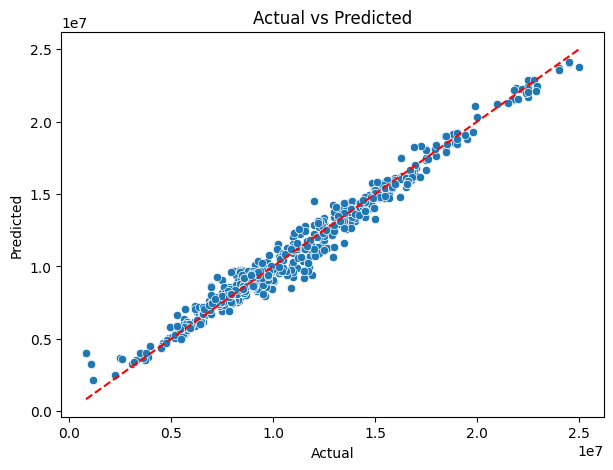

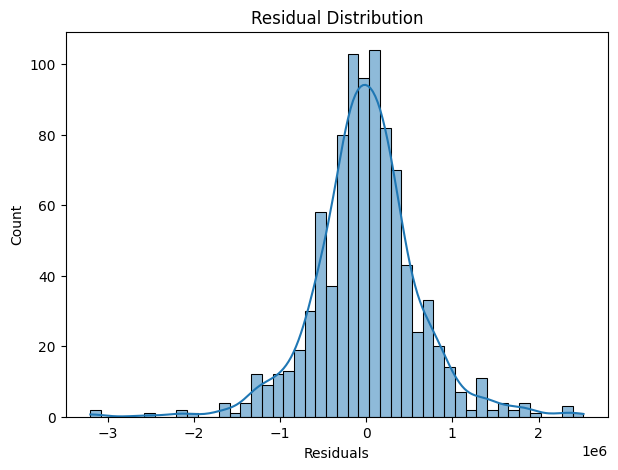


R^2 Score: 0.9771
Mean Squared Error: 367870499250.71


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

def visualize_model_performance(model, x, y):
    # Predict
    y_pred = model.predict(x)

    print("")
    # Scatter Plot: Actual vs Predicted
    plt.figure(figsize=(7, 5))
    sns.scatterplot(x=y, y=y_pred)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

    print("")
    # Residual Plot
    residuals = y - y_pred
    plt.figure(figsize=(7, 5))
    sns.histplot(residuals, kde=True)
    plt.title('Residual Distribution')
    plt.xlabel('Residuals')
    plt.show()

    # Print scores
    print("")
    print(f"R^2 Score: {r2_score(y, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y, y_pred):.2f}")


# Gradient Boosting (replace with your best GridSearchCV model)
best_model = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)
best_model.fit(x, y)

# Visualize
visualize_model_performance(best_model, x, y)


### Train the full dataset using GradientBoostingRegressor

In [ ]:
# Create the model with the best parameters from your GridSearchCV
final_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=5,
    n_estimators=100
)

# Train on the full dataset
final_model.fit(x, y)

GradientBoostingRegressor(max_depth=5)

### Predict on the same training dataset

In [ ]:
# Predict on training data
y_pred = final_model.predict(x)

# Display first 10 results
print(y_pred[:10])

[ 9008352.8697388   7520216.70858846  9165485.22855637 11557427.46503113
 15378445.67301392  9928977.87859085  9378361.59084009 12690601.35673754
  7987533.71251384 23685772.72918863]


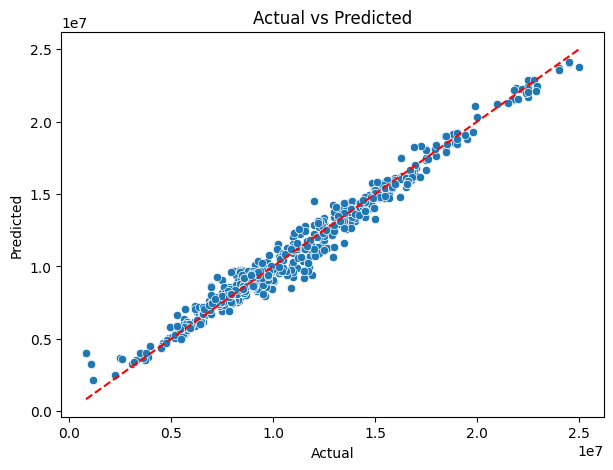

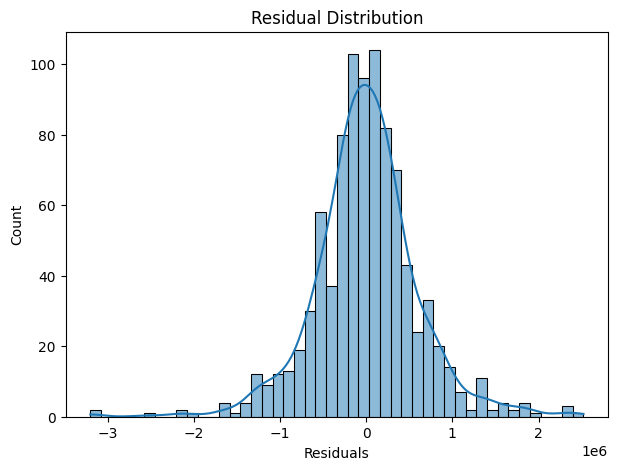


R^2 Score: 0.9771
Mean Squared Error: 367871744603.46


In [ ]:
visualize_model_performance(final_model, x, y)

# Save the training model

In [ ]:
import joblib

# Save to file
joblib.dump(final_model, 'gradient_boosting_model.pkl')

# Save feature columns from training data 'x' (DataFrame)
joblib.dump(list(x.columns), 'model_columns.pkl')

['model_columns.pkl']

In [ ]:
print(list(x.columns))

['year_of_manufacture', 'engine_capacity', 'mileage', 'vehicle_age', 'mileage_per_year', 'model_aqua', 'model_avanza', 'model_axio', 'model_belta', 'model_camry', 'model_chr', 'model_corolla', 'model_fortuner', 'model_harrier', 'model_hilux', 'model_passo', 'model_premio', 'model_prius', 'model_vitz', 'model_voxy', 'model_wigo', 'model_yaris', 'transmission_manual', 'transmission_tiptronic', 'body_type_mpv', 'body_type_saloon', 'body_type_sedan', 'body_type_station_wagon', 'body_type_suv_/_4x4', 'fuel_type_hybrid', 'fuel_type_petrol']


In [ ]:
import datetime

# Load model and feature columns once
final_model = joblib.load('gradient_boosting_model.pkl')
model_columns = joblib.load('model_columns.pkl')  # This should be a list of all feature column names

def preprocess_input(model, year_of_manufacture, transmission, body_type, fuel_type, engine_capacity, mileage):
    """
    Prepare and encode the input features to match the training data format.
    """
    # Compute derived features
    current_year = datetime.datetime.now().year
    vehicle_age = current_year - year_of_manufacture
    mileage_per_year = mileage / vehicle_age if vehicle_age > 0 else mileage

    # Create DataFrame from input
    input_data = pd.DataFrame([{
        'year_of_manufacture': year_of_manufacture,
        'engine_capacity': engine_capacity,
        'mileage': mileage,
        'vehicle_age': vehicle_age,
        'mileage_per_year': mileage_per_year,
        'model': model.lower(),
        'transmission': transmission.lower(),
        'body_type': body_type.lower(),
        'fuel_type': fuel_type.lower(),
    }])

    # One-hot encode categorical columns
    input_encoded = pd.get_dummies(input_data, columns=['model', 'transmission', 'body_type', 'fuel_type'])

    # Add missing columns and ensure all columns exist
    for col in model_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match the training set
    input_encoded = input_encoded[model_columns]

    return input_encoded

def predict_price_simple(model, year_of_manufacture, transmission, body_type, fuel_type, engine_capacity, mileage):
    """
    Predict vehicle price using the pre-trained model, given the vehicle attributes.
    """
    try:
        # Preprocess the input
        prepared_input = preprocess_input(model, year_of_manufacture, transmission, body_type, fuel_type, engine_capacity, mileage)

        # Make the prediction
        predicted_price = final_model.predict(prepared_input)[0]

        # Return formatted price
        return f"Rs. {predicted_price:,.0f}"  # Rounded and formatted with commas

    except Exception as e:
        return f"Error during prediction: {e}"


# Sample data

In [ ]:
new_price = predict_price_simple(
    model="Aqua",
    year_of_manufacture=2015,
    transmission="Automatic",
    body_type="SUV_/_4x4",
    fuel_type="Hybrid",
    engine_capacity=1500,
    mileage=45000
)

print(f"Predicted Price: Rs. {new_price}")

Predicted Price: Rs. Rs. 9,163,868


## Optional way

In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime

def final_predict_price(model, year_of_manufacture, transmission, body_type, fuel_type, engine_capacity, mileage):
    current_year = datetime.now().year
    vehicle_age = current_year - year_of_manufacture
    mileage_per_year = mileage / vehicle_age

    # Create an array of zeros
    x = np.zeros(len(model_columns))

    # Set numeric features
    x[0] = year_of_manufacture
    x[1] = engine_capacity
    x[2] = mileage
    x[3] = vehicle_age
    x[4] = mileage_per_year

    # Set categorical features
    feature_mappings = {
        f"model_{model.lower()}": model,
        f"transmission_{transmission.lower()}": transmission,
        f"body_type_{body_type.lower()}": body_type,
        f"fuel_type_{fuel_type.lower()}": fuel_type
    }

    for col_name in feature_mappings.keys():
        # Safely unpack the np.where() result
        idx = np.where(model_columns == col_name)[0]
        if idx.size > 0:
          x[idx[0]] = 1

    # Convert to DataFrame to match training input format
    x_df = pd.DataFrame([x], columns=model_columns)

    # Predict
    return final_model.predict(x_df)[0]


In [ ]:
new_price = final_predict_price(
    model="Aqua",
    year_of_manufacture=2015,
    transmission="Automatic",
    body_type="SUV_/_4x4",
    fuel_type="Hybrid",
    engine_capacity=1500,
    mileage=45000
)

print(f"Predicted Price: Rs. {round(new_price):,}")

Predicted Price: Rs. 10,465,885


/tmp/ipython-input-179-456868588.py:30: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  idx = np.where(model_columns == col_name)[0]


## Export model and column data

In [ ]:
import pickle
with open('car_price_model.pickle','wb') as f:
    pickle.dump(final_model,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in model_columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))